In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data)

      ResponseId                                         MainBranch  \
0              1                     I am a developer by profession   
1              2                     I am a developer by profession   
2              3                     I am a developer by profession   
3              4                              I am learning to code   
4              5                     I am a developer by profession   
...          ...                                                ...   
2887        2888                     I am a developer by profession   
2888        2889                     I am a developer by profession   
2889        2890                     I am a developer by profession   
2890        2891  I am not primarily a developer, but I write co...   
2891        2892                     I am a developer by profession   

                     Age                              Employment  \
0     Under 18 years old                     Employed, full-time   
1        35

In [5]:
data.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [7]:
data.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 2.5+ MB


In [11]:
missing_values = data.isna().sum()
print(missing_values)

ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork              478
                       ... 
JobSatPoints_11        1386
SurveyLength             44
SurveyEase               39
ConvertedCompYearly    1483
JobSat                 1408
Length: 114, dtype: int64


In [13]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_summary = missing_summary[missing_summary["Missing Values"] > 0]
print(missing_summary)

                     Missing Values  Percentage
RemoteWork                      478   16.528354
CodingActivities                479   16.562932
LearnCode                         8    0.276625
LearnCodeOnline                 487   16.839557
TechDoc                         826   28.561549
...                             ...         ...
JobSatPoints_11                1386   47.925311
SurveyLength                     44    1.521438
SurveyEase                       39    1.348548
ConvertedCompYearly            1483   51.279391
JobSat                         1408   48.686030

[108 rows x 2 columns]


In [15]:
data["ConvertedCompYearly"].fillna(data["ConvertedCompYearly"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4796\1348444284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ConvertedCompYearly"].fillna(data["ConvertedCompYearly"].median(), inplace=True)


In [17]:
data["RemoteWork"].fillna(data["RemoteWork"].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4796\918453430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["RemoteWork"].fillna(data["RemoteWork"].mode()[0], inplace=True)


In [19]:
data["JobSat"].fillna(data["JobSat"].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4796\1657906971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["JobSat"].fillna(data["JobSat"].mode()[0], inplace=True)


In [21]:
data.dropna(subset=["Employment", "JobSat"], inplace=True)

In [25]:
print(data["Employment"].value_counts())

Employment
Employed, full-time                                                                                                               1723
Independent contractor, freelancer, or self-employed                                                                               274
Student, full-time                                                                                                                 165
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           160
Not employed, but looking for work                                                                                                 128
Retired                                                                                                                             44
Student, full-time;Employed, part-time                                                                                              42
Employed, part-time                         

In [27]:
print(data["JobSat"].value_counts())

JobSat
8.0     1796
7.0      277
9.0      193
6.0      192
10.0     141
5.0      103
4.0       59
3.0       58
2.0       39
1.0       18
0.0       16
Name: count, dtype: int64


In [29]:
print(data["YearsCodePro"].value_counts())

YearsCodePro
10                    173
3                     154
5                     154
2                     142
4                     131
6                     129
7                     124
8                     113
12                    104
Less than 1 year      100
1                      94
20                     88
9                      83
15                     81
25                     73
11                     70
14                     56
17                     56
18                     53
30                     52
13                     50
16                     47
23                     36
22                     36
24                     35
19                     28
28                     27
27                     27
21                     22
26                     22
31                     16
35                     15
34                     13
32                     11
40                     11
29                     10
38                      9
37                      7

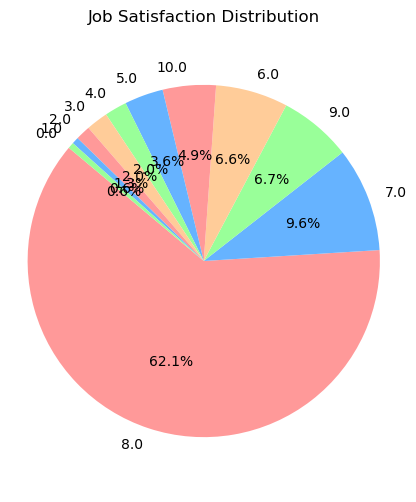

In [33]:
job_sat_counts = data["JobSat"].value_counts()
labels = job_sat_counts.index
sizes = job_sat_counts.values

plt.figure(figsize=(5, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
plt.title("Job Satisfaction Distribution")
plt.axis("equal") 
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4796\3826417800.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x="JobSat_num", fill=True, bw_adjust=0.5, color="royalblue")


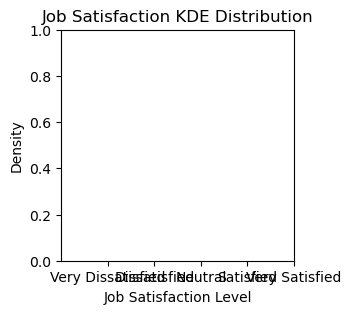

In [37]:
job_sat_mapping = {
    "Very dissatisfied": 1,
    "Dissatisfied": 2,
    "Neutral": 3,
    "Satisfied": 4,
    "Very satisfied": 5
}

data["JobSat_num"] = data["JobSat"].map(job_sat_mapping)
plt.figure(figsize=(3, 3))
sns.kdeplot(data=data, x="JobSat_num", fill=True, bw_adjust=0.5, color="royalblue")
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=["Very Dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very Satisfied"])
plt.title("Job Satisfaction KDE Distribution")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Density")
plt.show()

In [39]:
from collections import Counter
lang_worked = data["LanguageHaveWorkedWith"].dropna().str.split(";").explode()
lang_want = data["LanguageWantToWorkWith"].dropna().str.split(";").explode()
worked_counts = Counter(lang_worked)
want_counts = Counter(lang_want)
df_langs = pd.DataFrame({"Language": list(set(worked_counts.keys()).union(set(want_counts.keys())))})
df_langs["WorkedWith"] = df_langs["Language"].map(worked_counts).fillna(0)
df_langs["WantToWorkWith"] = df_langs["Language"].map(want_counts).fillna(0)
df_langs = df_langs.sort_values(by="WorkedWith", ascending=False).head(15) 

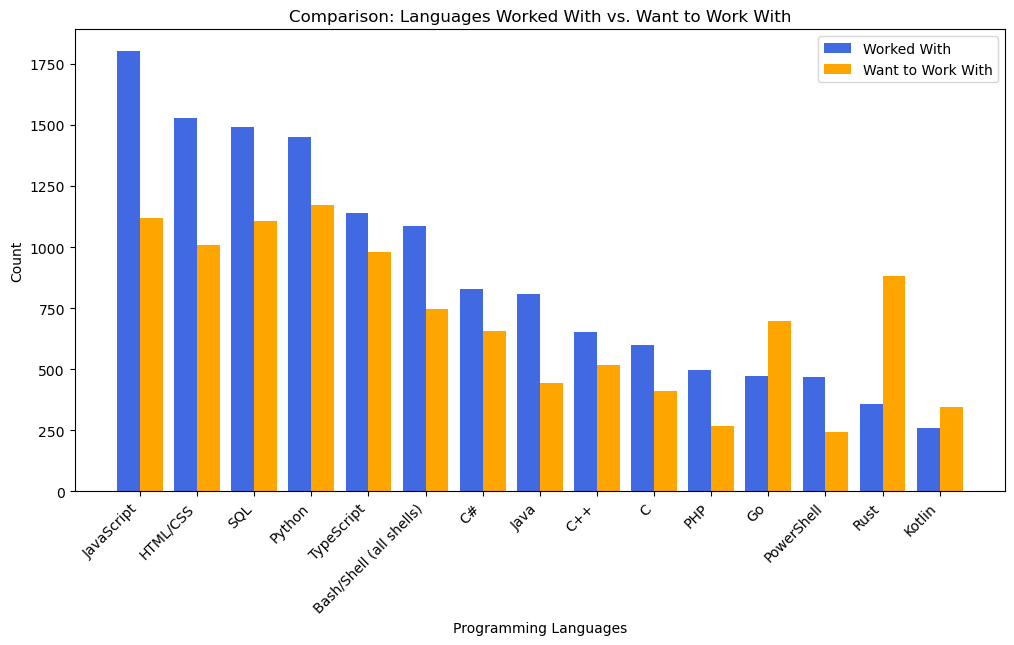

In [41]:
x = np.arange(len(df_langs))
width = 0.4  
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_langs["WorkedWith"], width, label="Worked With", color="royalblue")
plt.bar(x + width/2, df_langs["WantToWorkWith"], width, label="Want to Work With", color="orange")
plt.xticks(x, df_langs["Language"], rotation=45, ha="right")
plt.xlabel("Programming Languages")
plt.ylabel("Count")
plt.title("Comparison: Languages Worked With vs. Want to Work With")
plt.legend()
plt.show()

In [45]:
!pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45396 sha256=2b1a3f27f2613d8bcd97ef8db49f4d0eca18e0129308c8c300ee7ada635e02bc
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\8a\29\52\4d90d9556445079f88255b87a75d951357eff52d0795b88f4f
Successfully built matplotlib-venn


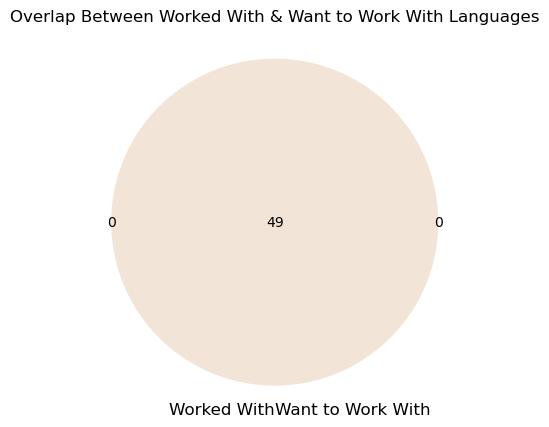

In [47]:
from matplotlib_venn import venn2  
set_worked = set(lang_worked)
set_want = set(lang_want)
plt.figure(figsize=(6, 5))
venn2([set_worked, set_want], set_labels=("Worked With", "Want to Work With"), set_colors=("royalblue", "orange"))
plt.title("Overlap Between Worked With & Want to Work With Languages")
plt.show()

<Figure size 1200x1200 with 0 Axes>

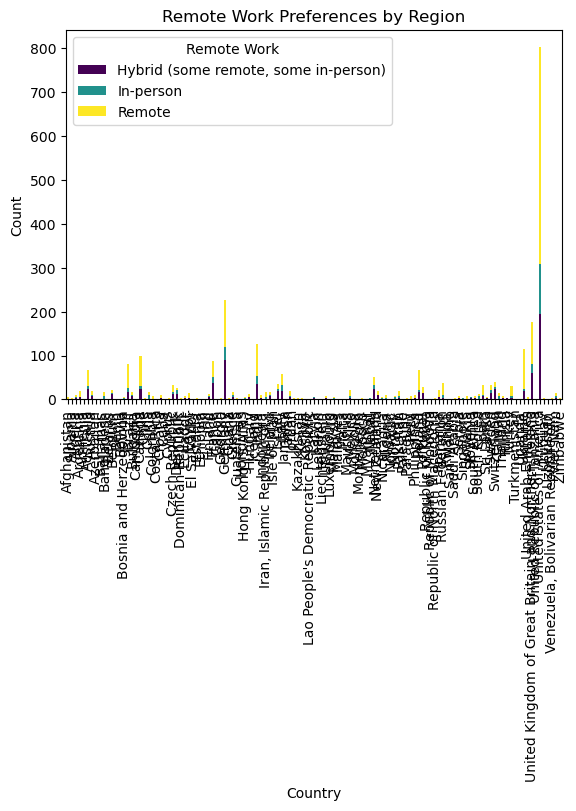

In [53]:
remote_work_counts = data.groupby(["Country", "RemoteWork"]).size().unstack()
plt.figure(figsize=(12, 12))
remote_work_counts.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Remote Work Preferences by Region")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Remote Work")
plt.xticks(rotation=90)
plt.show()

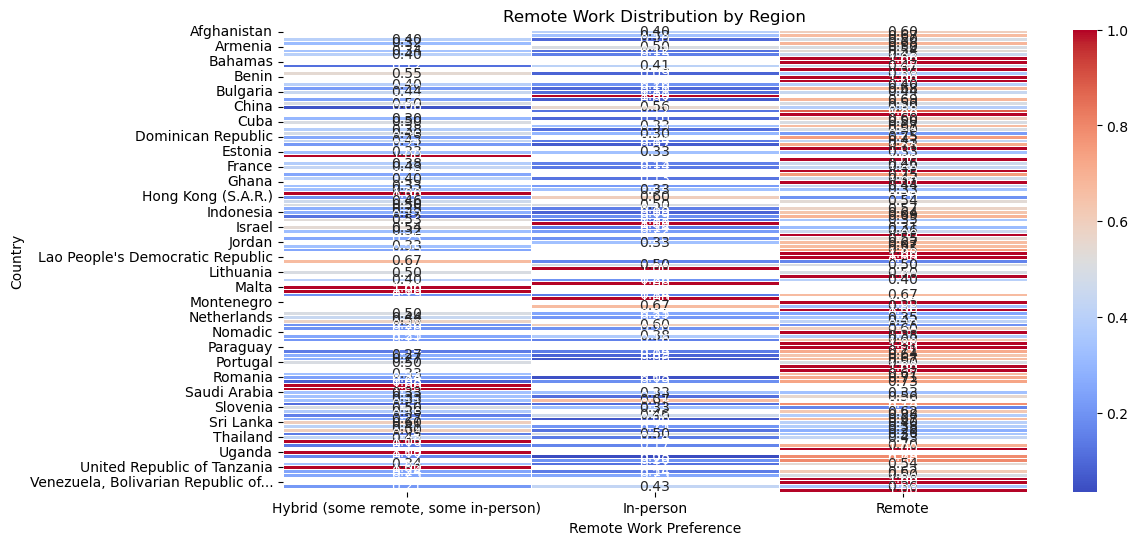

In [55]:
remote_work_normalized = remote_work_counts.div(remote_work_counts.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(remote_work_normalized, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Remote Work Distribution by Region")
plt.xlabel("Remote Work Preference")
plt.ylabel("Country")
plt.show()

In [ ]:
import scipy.stats as stats
# Convert `JobSat` to numerical scale (example mapping)
satisfaction_mapping = {
    "Very satisfied": 5,
    "Satisfied": 4,
    "Neutral": 3,
    "Dissatisfied": 2,
    "Very dissatisfied": 1
}
data["JobSat_numeric"] = data["JobSat"].map(satisfaction_mapping)

# Convert `YearsCodePro` to numeric
data["YearsCodePro"] = pd.to_numeric(data["YearsCodePro"], errors="coerce")

# Drop missing values
data_cleaned = data.dropna(subset=["JobSat_numeric", "YearsCodePro"])

# Pearson Correlation (linear relationship)
pearson_corr, p_value_pearson = stats.pearsonr(data_cleaned["YearsCodePro"], data_cleaned["JobSat_numeric"])

# Spearman Correlation (monotonic relationship)
spearman_corr, p_value_spearman = stats.spearmanr(data_cleaned["YearsCodePro"], data_cleaned["JobSat_numeric"])

# Display results
print(f"Pearson Correlation: {pearson_corr:.3f} (p-value: {p_value_pearson:.3f})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value: {p_value_spearman:.3f})")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cross-tabulation
employment_education_ct = pd.crosstab(data["Employment"], data["EdLevel"], normalize="index") * 100

# Display the table
print(employment_education_ct)